In [1]:
# keras
from keras.models import Sequential
from keras import backend as K
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.initializers import RandomNormal
from keras.optimizers import Adam
from feature_selection import FeatureSelection

# other
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/Users/kohei_wakamatsu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# prepare data
random_data = np.random.rand(300, 10)
np_x = random_data
np_y = np_x[:,0] + np_x[:,1]*2 + np_x[:,2]*3 + np_x[:,3]*4 

# split data
x_train, x_test, y_train, y_test = train_test_split(np_x, np_y, test_size=0.3)

In [3]:
# modelの定義
def regression_model():
    model = Sequential()
    
    model.add(FeatureSelection(activation='tanh', input_shape=tuple(x_train.shape[1:])))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.10))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.10))
    
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model= regression_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_selection_1 (Feature (None, 10)                10        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                352       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


In [4]:
# learn
result = model.fit(x_train, y_train, batch_size=32, epochs=100)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/100
210/210 [==============================] - 0s 2ms/step - loss: 26.7951
Epoch 2/100
210/210 [==============================] - 0s 55us/step - loss: 26.0871
Epoch 3/100
210/210 [==============================] - 0s 87us/step - loss: 25.1882
Epoch 4/100
210/210 [==============================] - 0s 61us/step - loss: 24.1339
Epoch 5/100
210/210 [==============================] - 0s 78us/step - loss: 22.7463
Epoch 6/100
210/210 [==============================] - 0s 58us/step - loss: 20.8797
Epoch 7/100
210/210 [==============================] - 0s 61us/step - loss: 18.8362
Epoch 8/100
210/210 [==============================] - 0s 69us/step - loss: 16.2794
Epoch 9/100
210/210 [==============================] - 0s 67us/step - loss: 13.4462
Epoch 10/100
210/210 [==============================] - 0s 67us/step - loss: 10.0025
Epoch 11/100
210/210 [==============================] - 0s 69us/step - loss: 7.1321
Epoch 12/100
210/210 [==============================] - 0s 69us/step - loss:

210/210 [==============================] - 0s 59us/step - loss: 0.2760
Epoch 99/100
210/210 [==============================] - 0s 53us/step - loss: 0.3250
Epoch 100/100
90/90 [==============================] - 0s 301us/step


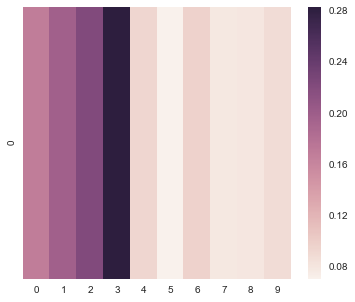

In [5]:
# 重みを見る用
w_fs_array = abs(model.get_weights()[0]).reshape(1, -1)

plt.figure(figsize=(6,5))
sns.heatmap(w_fs_array)
plt.show()

In [6]:
# compare by activation function
# まとめて見る用
results = {}
w_fs = {}
b_fs = {}

for act in ['None', 'relu', 'tanh']:
    model = Sequential()
    
    model.add(FeatureSelection(activation=act, input_shape=tuple(x_train.shape[1:])))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.10))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.10))
    
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    results[act] = model.fit(x_train, y_train, batch_size=32, epochs=100)
    w_fs[act] = abs(model.get_weights()[0]).reshape(1, -1)
    b_fs[act] = abs(model.get_weights()[1]).reshape(1, -1)

Epoch 1/100
210/210 [==============================] - 0s 2ms/step - loss: 26.9795
Epoch 2/100
210/210 [==============================] - 0s 73us/step - loss: 26.5845
Epoch 3/100
210/210 [==============================] - 0s 73us/step - loss: 26.1029
Epoch 4/100
210/210 [==============================] - 0s 89us/step - loss: 25.4906
Epoch 5/100
210/210 [==============================] - 0s 116us/step - loss: 24.6976
Epoch 6/100
210/210 [==============================] - 0s 83us/step - loss: 23.6944
Epoch 7/100
210/210 [==============================] - 0s 76us/step - loss: 22.5296
Epoch 8/100
210/210 [==============================] - 0s 81us/step - loss: 20.8872
Epoch 9/100
210/210 [==============================] - 0s 95us/step - loss: 18.8249
Epoch 10/100
210/210 [==============================] - 0s 90us/step - loss: 16.4437
Epoch 11/100
210/210 [==============================] - 0s 78us/step - loss: 13.6003
Epoch 12/100
210/210 [==============================] - 0s 57us/step - los

210/210 [==============================] - 0s 67us/step - loss: 0.4212
Epoch 99/100
210/210 [==============================] - 0s 62us/step - loss: 0.3099
Epoch 100/100
210/210 [==============================] - 0s 61us/step - loss: 0.3498
Epoch 1/100
210/210 [==============================] - 1s 3ms/step - loss: 26.8360
Epoch 2/100
210/210 [==============================] - 0s 64us/step - loss: 26.1413
Epoch 3/100
210/210 [==============================] - 0s 79us/step - loss: 25.3088
Epoch 4/100
210/210 [==============================] - 0s 62us/step - loss: 24.1831
Epoch 5/100
210/210 [==============================] - 0s 60us/step - loss: 22.8285
Epoch 6/100
210/210 [==============================] - 0s 66us/step - loss: 21.0014
Epoch 7/100
210/210 [==============================] - 0s 67us/step - loss: 18.8948
Epoch 8/100
210/210 [==============================] - 0s 67us/step - loss: 16.3400
Epoch 9/100
210/210 [==============================] - 0s 69us/step - loss: 13.5263
Epoch

210/210 [==============================] - 0s 66us/step - loss: 1.5289
Epoch 96/100
210/210 [==============================] - 0s 54us/step - loss: 1.6851
Epoch 97/100
210/210 [==============================] - 0s 74us/step - loss: 1.4918
Epoch 98/100
210/210 [==============================] - 0s 59us/step - loss: 1.7347
Epoch 99/100
210/210 [==============================] - 0s 69us/step - loss: 1.7815
Epoch 100/100
210/210 [==============================] - 0s 74us/step - loss: 1.4680
Epoch 1/100
210/210 [==============================] - 0s 2ms/step - loss: 26.8805
Epoch 2/100
210/210 [==============================] - 0s 61us/step - loss: 26.3171
Epoch 3/100
210/210 [==============================] - 0s 83us/step - loss: 25.5697
Epoch 4/100
210/210 [==============================] - 0s 76us/step - loss: 24.6193
Epoch 5/100
210/210 [==============================] - 0s 73us/step - loss: 23.3865
Epoch 6/100
210/210 [==============================] - 0s 70us/step - loss: 21.9398
Epoch

210/210 [==============================] - 0s 55us/step - loss: 0.3897
Epoch 92/100
210/210 [==============================] - 0s 53us/step - loss: 0.4167
Epoch 93/100
210/210 [==============================] - 0s 58us/step - loss: 0.3234
Epoch 94/100
210/210 [==============================] - 0s 53us/step - loss: 0.4155
Epoch 95/100
210/210 [==============================] - 0s 78us/step - loss: 0.4185
Epoch 96/100
210/210 [==============================] - 0s 62us/step - loss: 0.3385
Epoch 97/100
210/210 [==============================] - 0s 55us/step - loss: 0.3552
Epoch 98/100
210/210 [==============================] - 0s 52us/step - loss: 0.3675
Epoch 99/100
210/210 [==============================] - 0s 52us/step - loss: 0.3453
Epoch 100/100
210/210 [==============================] - 0s 58us/step - loss: 0.3018


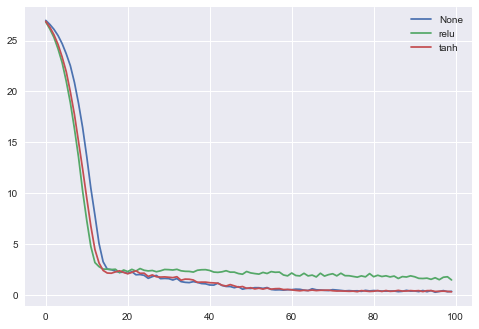

In [7]:
# learning curve
for act in ['None', 'relu', 'tanh']:
    plt.plot(results[act].epoch, results[act].history['loss'], label=act)
    
plt.legend()
plt.show()

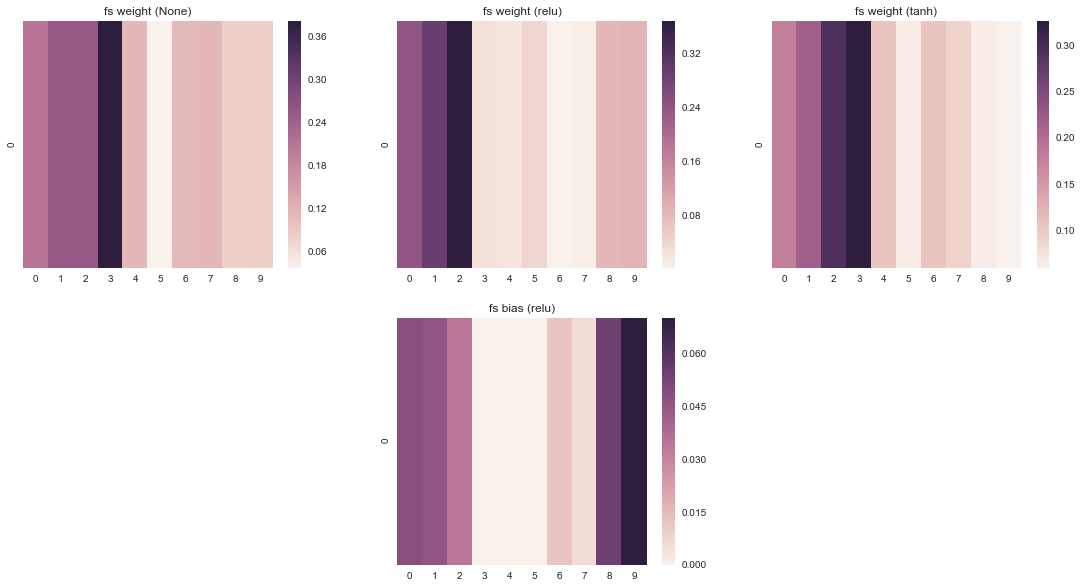

In [8]:
# heatmap
fig = plt.figure(figsize=(19, 10))

for i, act in enumerate(['None', 'relu', 'tanh']):
    plt.subplot(2, 3, i+1)
    sns.heatmap(w_fs[act])
    plt.title("fs weight (" + act + ")")

plt.subplot(2, 3, 5)
sns.heatmap(b_fs['relu'])
plt.title("fs bias (relu)")
plt.show()